In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np

from sky_spot import utils
from plot import *

sns.set_style('whitegrid')

InitMatplotlib(7, 7)

RESTART_OVERHEAD_HOURS = 0.2
DDL = 'search'
TASK = 48
dfs = []

PLOT_DDL = 60

for RESTART_OVERHEAD_HOURS in [0.1, 0.2, 0.3, 0.4, 0.5]:
    # results_path = f'../../results/real/overhead={RESTART_OVERHEAD_HOURS:.2f}'
    # results_path = f'../../results/real/ddl=search+task=76+overhead={RESTART_OVERHEAD_HOURS:.2f}'
    results_path = f'../../results/real/ddl={DDL}+task={TASK}+overhead={RESTART_OVERHEAD_HOURS:.2f}'

    for result_path in os.listdir(results_path):
        if not result_path.endswith('.csv'):
            continue
        df = pd.read_csv(os.path.join(results_path, result_path))
        df['env_path'] = result_path
        print(result_path, df['avg_spot_hours'].values[0], df['avg_wait_hours'].values[0])
        df['spot_fraction'] = df['avg_spot_hours'] / (df['avg_wait_hours'] + df['avg_spot_hours'])
        if 'deadline_hours' in df.columns:
            df['task_fraction'] = df['task_duration_hours'] / df['deadline_hours']
        else:
            df['task_fraction'] = df['task_duration_hours'] / DDL
        df.drop_duplicates(inplace=True)
        df['overhead'] = RESTART_OVERHEAD_HOURS
        df = df[np.isclose(df['deadline_hours'], PLOT_DDL)]
        dfs.append(df)
dfs = pd.concat(dfs, ignore_index=True)
dfs

use_tex True 
font_size 7 
title_size 7
us-west-2b_v100_1.csv 1.962962962962963 1.3351851851851853
us-west-2a_k80_8.csv 1.8258426966292136 1.4925925925925925
us-west-2b_v100_8.csv 0.579047619047619 1.1171428571428572
us-west-2a_v100_1.csv 2.290262172284645 1.056818181818182
us-west-2b_k80_8.csv 1.28641975308642 0.9123456790123456
us-west-2a_k80_1.csv 6.5852713178294575 0.3253968253968253
us-west-2b_k80_1.csv 1.700757575757576 5.045454545454546
us-west-2a_v100_8.csv 0.6913145539906104 1.3892773892773893
us-west-2b_v100_1.csv 1.962962962962963 1.3351851851851853
us-west-2a_k80_8.csv 1.8258426966292136 1.4925925925925925
us-west-2b_v100_8.csv 0.579047619047619 1.1171428571428572
us-west-2a_v100_1.csv 2.290262172284645 1.056818181818182
us-west-2b_k80_8.csv 1.28641975308642 0.9123456790123456
us-west-2a_k80_1.csv 6.5852713178294575 0.3253968253968253
us-west-2b_k80_1.csv 1.700757575757576 5.045454545454546
us-west-2a_v100_8.csv 0.6913145539906104 1.3892773892773893
us-west-2b_v100_1.csv 1.

,strategy,env_path,avg_spot_hours,avg_wait_hours,deadline_hours,keep_on_demand,task_duration_hours,num_slices,avg_cost,slice_interval_hours,costs,spot_fraction,task_fraction,overhead
0,ideal_ilp_overhead,us-west-2b_v100_1.csv,1.962963,1.335185,60,NaN,48,NaN,90.126712,NaN,NaN,0.595171,0.8,0.1
1,ideal_ilp_overhead_sliced,us-west-2b_v100_1.csv,1.962963,1.335185,60,NaN,48,NaN,96.226724,6.0,NaN,0.595171,0.8,0.1
2,ideal_ilp_overhead_sliced_by_num,us-west-2b_v100_1.csv,1.962963,1.335185,60,NaN,48,4.0,93.572161,NaN,NaN,0.595171,0.8,0.1
3,ideal_ilp_overhead_sliced_by_num,us-west-2b_v100_1.csv,1.962963,1.335185,60,NaN,48,8.0,95.395071,NaN,NaN,0.595171,0.8,0.1
4,ideal_ilp_overhead_sliced_by_num,us-west-2b_v100_1.csv,1.962963,1.335185,60,NaN,48,16.0,98.830950,NaN,NaN,0.595171,0.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,time_sliced_by_num,us-west-2a_v100_8.csv,0.691315,1.389277,60,NaN,48,90.0,173.829041,NaN,NaN,0.332268,0.8,0.5
3617,quick_optimal,us-west-2a_v100_8.csv,0.691315,1.389277,60,NaN,48,NaN,131.987246,NaN,NaN,0.332268,0.8,0.5
3618,rc_next_wait_spot_threshold,us-west-2a_v100_8.csv,0.691315,1.389277,60,NaN,48,NaN,136.706580,NaN,NaN,0.332268,0.8,0.5
3619,rc_cr_threshold,us-west-2a_v100_8.csv,0.691315,1.389277,60,NaN,48,NaN,149.203671,NaN,NaN,0.332268,0.8,0.5


/tmp/ipykernel_30452/2876750964.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimal_slice_df['strategy'] = f'ideal_ilp_overhead_sliced_by_num_{optimal_slice}'
/tmp/ipykernel_30452/2876750964.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimal_slice_df['strategy'] = f'ideal_ilp_overhead_sliced_by_num_{optimal_slice}'
/tmp/ipykernel_30452/2876750964.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

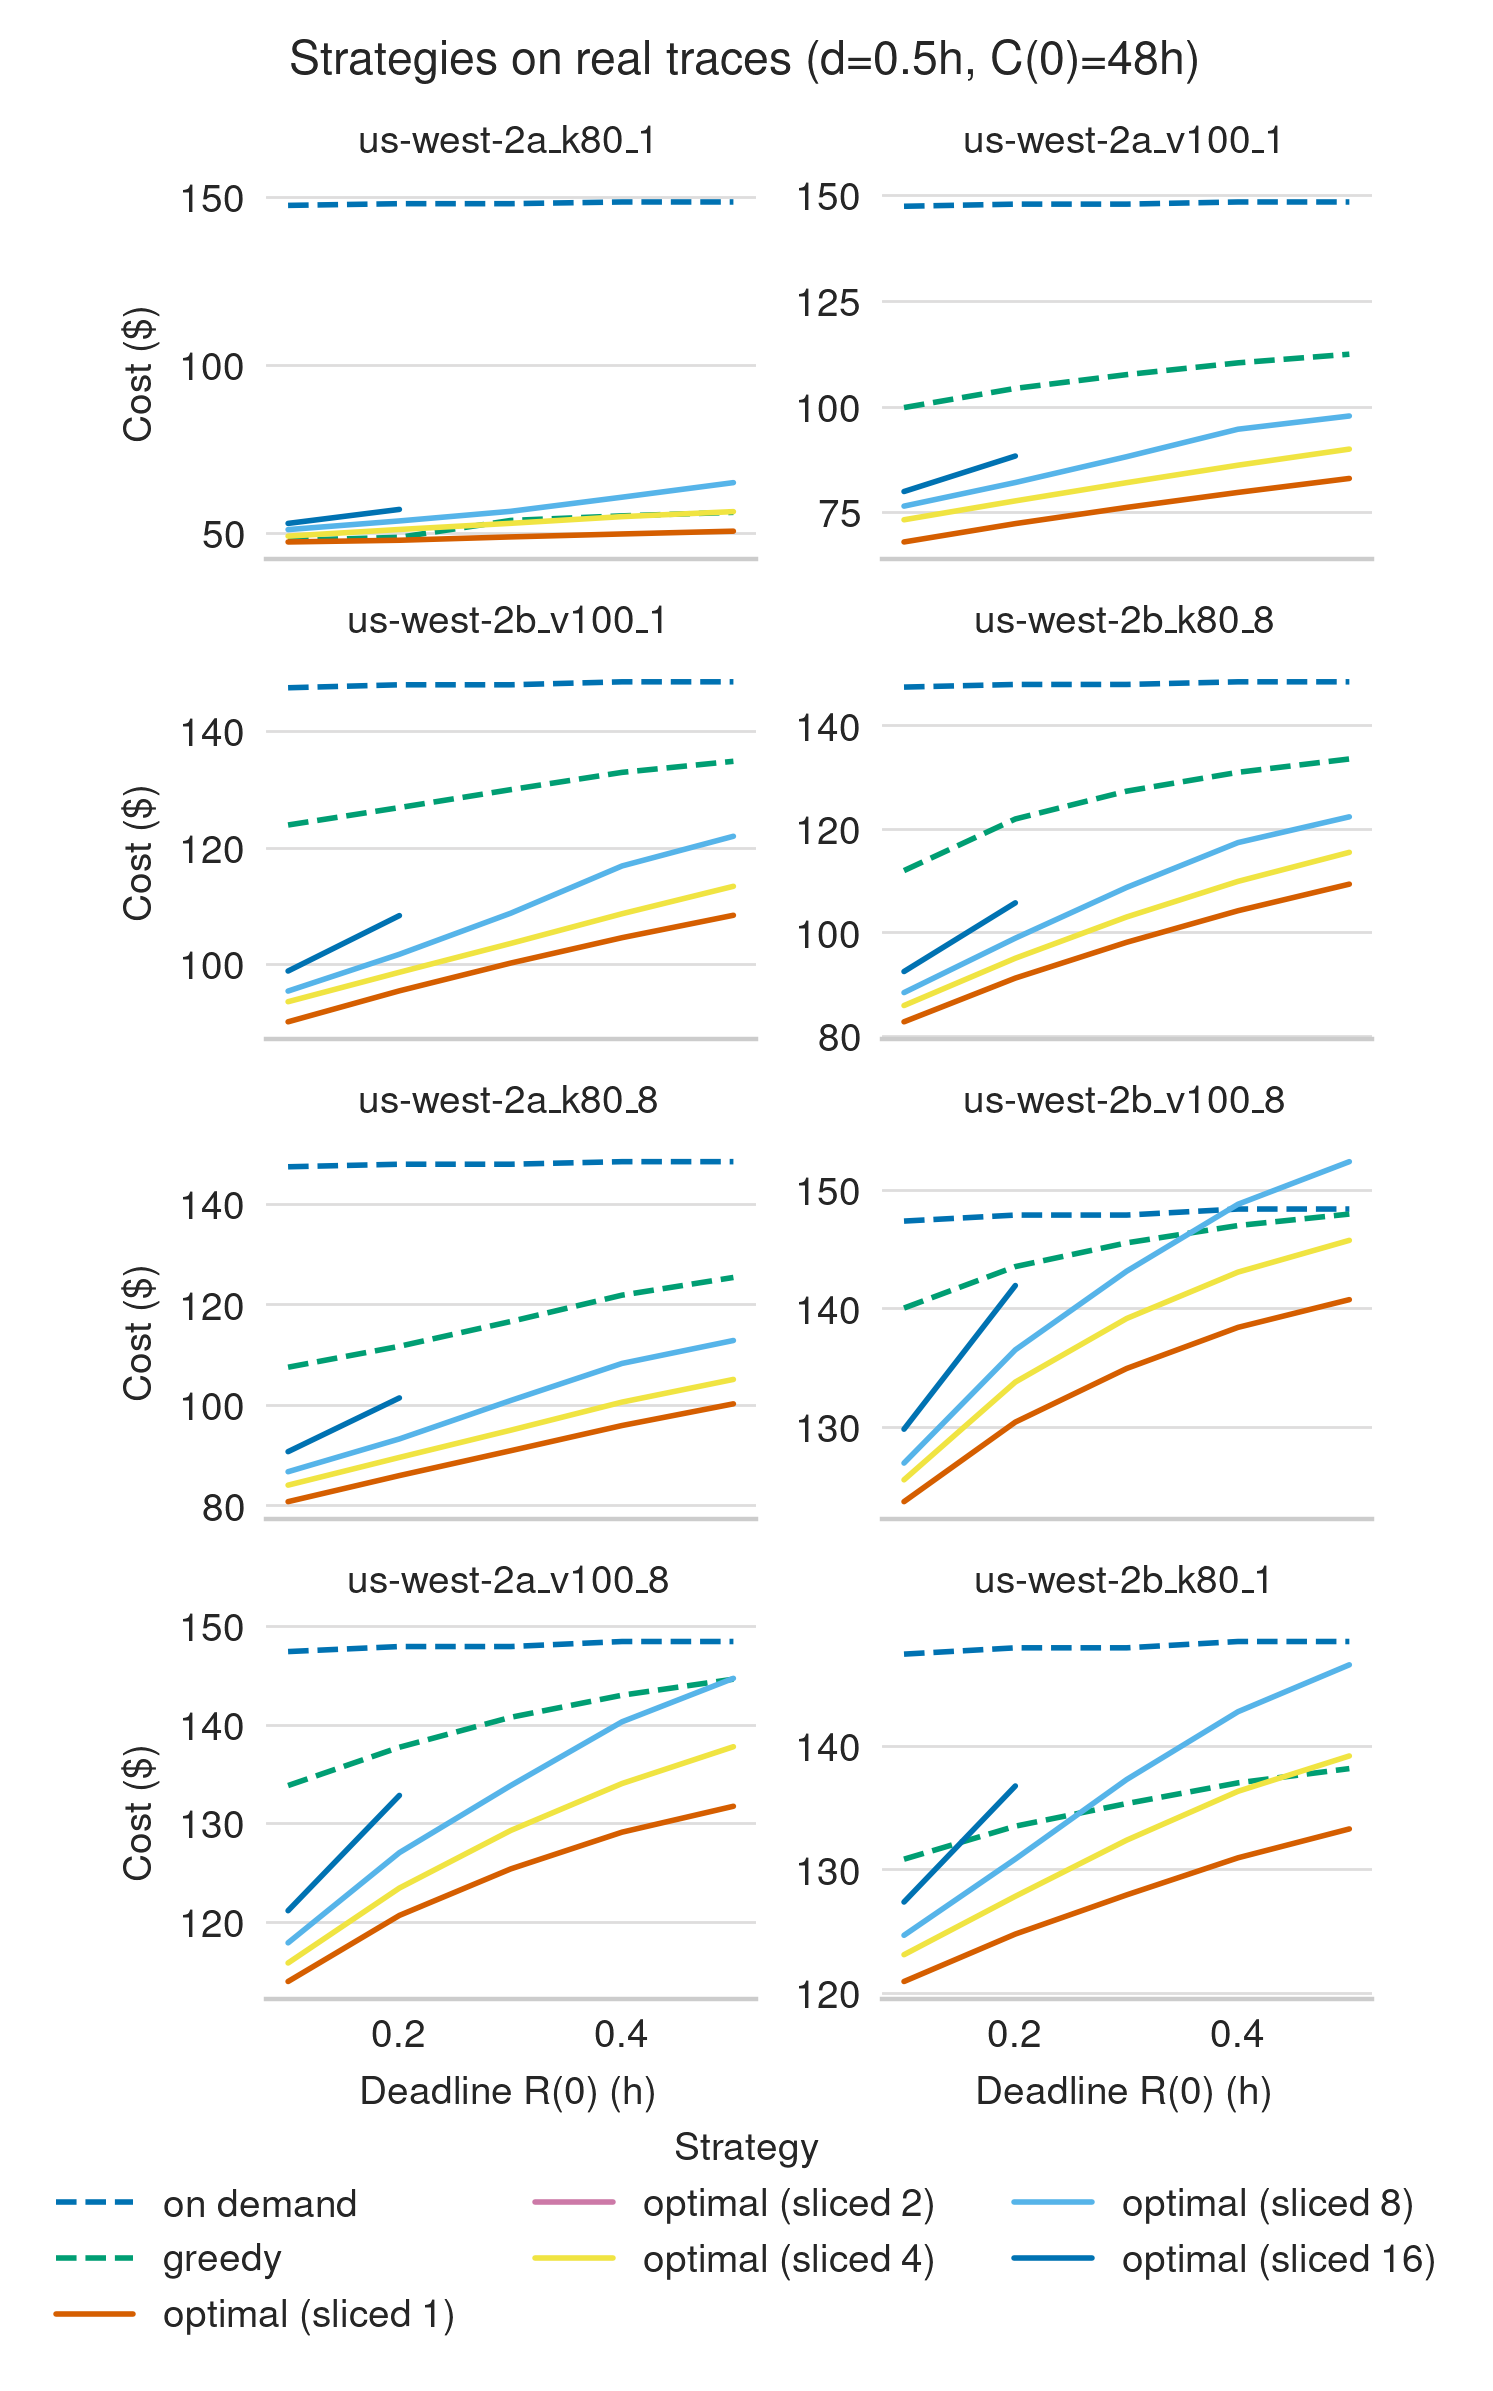

In [ ]:
NORMALIZE_BY_ON_DEMAND = False
# NORMALIZE_BY_ON_DEMAND = True

X_AXIS = 'overhead'
# X_AXIS = 'task_fraction'

v100_base_cost = utils.COSTS[utils.ClusterType.ON_DEMAND]
cost_scales = utils.COST_SCALES
if NORMALIZE_BY_ON_DEMAND:
    for name in cost_scales:
        cost_scales[name] = 1

DD_SCALE = 3

OPTIMAL_SLICES = [2, 4, 8, 16]

strategy_name_map = {
    'on_demand': 'on demand',
    'strawman': 'greedy',
    'ideal_ilp_overhead': 'optimal (sliced 1)',
    **{f'ideal_ilp_overhead_sliced_by_num_{s}':
    f'optimal (sliced {s})' for s in OPTIMAL_SLICES},
}

colors = sns.color_palette('colorblind', n_colors=10)

dfs.sort_values('spot_fraction', inplace=True, ascending=False)
env_paths = dfs['env_path'].unique()
# env_paths = ['us-west-2a_k80_1', 'us-west-2a_v100_1', 'us-west-2b_v100_1', 'us-west-2b_k80_1']

fig = plt.figure(figsize=[fig_width, fig_width / golden_mean], dpi=400)
axes = fig.subplots(len(env_paths) // 2, 2, sharex=True)
# axes = fig.subplots(1, 3, sharex=True)

dashed_strategies = ['on demand', 'greedy']

for i, env_path in enumerate(env_paths):
    df = dfs[dfs['env_path'].str.contains(env_path)]
    name = os.path.basename(env_path)
    device = name.replace('.csv', '').partition('_')[-1]
    cost_scale = cost_scales[device]
    ax = axes[i // 2, i % 2]
    # ax = axes[i]
    ax.set_title(
        f'{name.replace(".csv", "")}'
        # f'\n(spot_fraction={df["spot_fraction"].values[0]:.2f}, d={RESTART_OVERHEAD_HOURS:.2f}h)'
        # f'\navg_spot: {df["avg_spot_hours"].values[0]:.2f}h; avg_wait: {df["avg_wait_hours"].values[0]:.2f}h'
    )
    result_df = pd.DataFrame()
    result_df = pd.concat([
        df[df['strategy'] == 'on_demand'], result_df
    ],
                          ignore_index=True)
    result_df = pd.concat([
        df[df['strategy'] == 'strawman'], result_df
    ],
                          ignore_index=True)
    result_df = pd.concat([
        df[df['strategy'] == 'ideal_ilp_overhead'], result_df
    ],
                          ignore_index=True)
    for optimal_slice in OPTIMAL_SLICES:
        optimal_slice_df = df[(df['strategy'] == 'ideal_ilp_overhead_sliced_by_num')
           & (df['num_slices'] == optimal_slice)]
        optimal_slice_df['strategy'] = f'ideal_ilp_overhead_sliced_by_num_{optimal_slice}'
        result_df = pd.concat([
            optimal_slice_df, result_df
        ],
                            ignore_index=True)

    if NORMALIZE_BY_ON_DEMAND:
        on_demand_df = result_df[result_df['strategy'] == 'on_demand'][[
            X_AXIS, 'avg_cost'
        ]]
        result_df = result_df.merge(on_demand_df,
                                    on=X_AXIS,
                                    suffixes=('', '_on_demand'))
        result_df['avg_cost'] = result_df['avg_cost'] / result_df[
            'avg_cost_on_demand']
        result_df = result_df.drop(columns=['avg_cost_on_demand'])

    result_df = result_df.sort_values(by=[X_AXIS])
    for origin_name, strategy in strategy_name_map.items():
        strategy_df = result_df[result_df['strategy'] == origin_name]
        linestyle = '-' if strategy not in dashed_strategies else '--'
        sns.lineplot(x=strategy_df[X_AXIS],
                        y=strategy_df['avg_cost'] * cost_scale,
                        label=strategy,
                        ax=ax,
                        linestyle=linestyle)
    ax.legend().set_visible(False)
    ax.set_ylabel('')
    # ax.set_xlim(None, 80)
    ax.set_xlabel('Deadline R(0) (h)')

for ax in axes[:, 0]:
    # ax = axes[0]
    if NORMALIZE_BY_ON_DEMAND:
        ax.set_ylabel('Nomralized cost by on-demand')
    else:
        ax.set_ylabel(r'Cost (\$)')

fig.subplots_adjust(bottom=0.3)
handler_ax = axes[0, 0]
fig.legend(title='Strategy',
           loc='lower center',
           ncol=3,
           handles=handler_ax.get_legend_handles_labels()[0],
           bbox_to_anchor=(0.5, -0.1))
fig.suptitle(
    f'Strategies on real traces (d={RESTART_OVERHEAD_HOURS}h, C(0)={TASK}h)')
fig.tight_layout()
fig.savefig('figures/sliced_optimal.pdf', bbox_inches='tight')
plt.show()